## 차원의 저주(The Curse of Dimensionality)
데이터 학습을 위해 차원이 증가하면서 학습데이터 수가 차원의 수보다 적어져 성능이 저하되는 현상<br>
→ 즉, 차원(=변수)이 증가함에 따라 모델의 성능이 안좋아지는 현상 (관측치 수 << 변수의 수)

### *차원 축소 방법 : 1. Feature Selection / 2. Feature Extractration*

### Feature Selection
모델에 사용하기 위한 Feature들을 선택하는 과정 → 주로 정형 데이터
```
(최적의 feature 집합을 구하기 위한 모든 경우의 수는 2^n-1 이므로 feature가 많아질수록 너무 많은 경우의 수가 생기기 때문에 현실적으로 사용하기는 어려움)
```

#### benefits of feature selection
1. Reduces Overfitting
2. Improves Accuracy
3. Reduces Training Time

#### feature selection 방법
1. Filter methods : 통계분석이 모델의 성능과 직결되지 않기 때문에 이 결과가 모두 적합하다고 할 수 없다..<br>
    1) information gain<br>
    2) chi-square test<br>
    3) fisher score<br>
    4) correlation coefficient<br>
    5) variance threshold
2. Wrapper methods : 모델을 사용하여 성능 측면에서 가장 좋은 성능의 feature를 뽑아내는 방법 → 시간&비용이 오래걸림..<br>
    1) Forward selection : 가장 중요한 feature부터 추가하며 성능 비교<br>
    2) Backward selection<br>
    3) stepwise selection
3. Embedded methods : feature importance를 기반으로 한 feature 선택<br>
    다른 모델의 feature 선택의 전처리 단계로 활용 가능 & 한번에 모든 feature 고려<br>
    → 시간 증가, 성능 향상 (과적합을 줄이기 위해 내부적으로 penalty를 주는 방법)<br>
    1) Lasso<br>
    2) Ridge

### + Feature Extractration
데이터들의 특징 조합을 통하여 새로운 특징을 만들어 내는 것 → 주로 비정형 데이터(text 등)

feature extraction 방법
1. Linear methods<br>
    1) PCA(Principal Component Analysis)<br>
    2) LDA(Linear Discriminant Analysis)
2. Non-linear methods<br>
    1) AE(Auto Encoder)<br>
    2) t-SNE


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression

# Data


위스콘신 유방암 진단 데이터<br>
세포에 대한 정보 (radius:반경, texture:질감, perimeter:둘레, 등..)<br>
class: 클래스 결정 값 (0(악성) 또는 1(양성))

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.groupby('class')[['mean radius']].count()
#label 0:1 = 1:1.7 비율

,mean radius
class,
0,212
1,357


In [5]:
def get_clf_eval(y_test, pred, pred_proba):
    #accuracy : 전체에 대해 제대로 맞힌 비율
    print(f'Accuracy: {accuracy_score(y_test, pred)}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, pred)}')
    #Precision(정밀도) : 병에 걸렸다고 한 환자들 중, 실제로 병에 걸린 환자의 비율 / Recall(재현율) : 병에 걸린 환자들 중, 병에 걸렸다고 분류된 환자의 비율
    print(f'Precision: {precision_score(y_test, pred)}, Recall: {recall_score(y_test, pred)}')
    #F1 score : 최적일 때 1 / AUC : ROC 곡선 그래프에서 곡선의 아랫부분의 넓이 -> 값이 클 수록 좋은 모델
    print(f'F1: {f1_score(y_test, pred)}, AUC: {roc_auc_score(y_test, pred_proba)}')

In [76]:
# 전체 feature로 modeling
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(df.iloc[:, :-1].values, df['class'], df.index, test_size=0.3, random_state=99999)

In [7]:
#training set
df.iloc[idx_train, :].groupby('class')[['mean radius']].count()

,mean radius
class,
0,149
1,249


In [8]:
#test set
df.iloc[idx_test, :].groupby('class')[['mean radius']].count()

,mean radius
class,
0,63
1,108


In [9]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.9122807017543859
Confusion Matrix:
[[ 54   9]
 [  6 102]]
Precision: 0.918918918918919, Recall: 0.9444444444444444
F1: 0.9315068493150684, AUC: 0.9842739564961787


→ 예측 정확도 91%, 재현율 94%

### 1. Filter methods

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_oneway, chi2

In [12]:
#f_classif : ANOVA F-value
test = SelectKBest(score_func=f_classif, k=17)
fit = test.fit(df.iloc[:, :-1], df['class'])

In [13]:
#column별 F-value (표본 평균 간 변동 / 표본 내 변동)
fit.scores_ 

array([6.46981021e+02, 1.18096059e+02, 6.97235272e+02, 5.73060747e+02,
       8.36511234e+01, 3.13233079e+02, 5.33793126e+02, 8.61676020e+02,
       6.95274435e+01, 9.34592949e-02, 2.68840327e+02, 3.90947023e-02,
       2.53897392e+02, 2.43651586e+02, 2.55796780e+00, 5.32473391e+01,
       3.90144816e+01, 1.13262760e+02, 2.41174067e-02, 3.46827476e+00,
       8.60781707e+02, 1.49596905e+02, 8.97944219e+02, 6.61600206e+02,
       1.22472880e+02, 3.04341063e+02, 4.36691939e+02, 9.64385393e+02,
       1.18860232e+02, 6.64439606e+01])

In [14]:
#어떤 column이 선택되었는지 보여줌..
fit.get_support(indices=True)

array([ 0,  2,  3,  5,  6,  7, 10, 12, 13, 20, 21, 22, 23, 24, 25, 26, 27])

In [15]:
#실제로 그런지 확인..
for i in range(len(df.columns[:-1])):
    if [sorted(list(fit.scores_), reverse=True).index(x) for x in list(fit.scores_)][i] < 17:
        print(df.columns[:-1][i])

mean radius
mean perimeter
mean area
mean compactness
mean concavity
mean concave points
radius error
perimeter error
area error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points


In [16]:
df[['mean radius','mean perimeter', 'mean area', 'mean compactness',\
'mean concavity', 'mean concave points', 'radius error',\
'perimeter error', 'area error', 'worst radius', 'worst texture',\
'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness',\
'worst concavity', 'worst concave points']].iloc[idx_train, :]

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points
531,11.67,75.21,416.2,0.09453,0.04200,0.021570,0.2067,1.393,15.340,13.35,28.81,87.00,550.6,0.1550,0.29640,0.27580,0.08120
371,15.19,97.65,711.8,0.06934,0.03393,0.026570,0.1783,1.338,17.720,16.20,15.73,104.50,819.1,0.1126,0.17370,0.13620,0.08178
196,13.77,90.63,588.9,0.12670,0.13850,0.065260,0.6191,4.906,49.700,16.39,34.01,111.60,806.9,0.1737,0.31220,0.38090,0.16730
10,16.02,102.70,797.8,0.06669,0.03299,0.033230,0.3795,2.466,40.510,19.19,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975
142,11.43,73.66,398.0,0.09486,0.02031,0.018610,0.2843,1.937,21.380,12.78,26.76,82.66,503.0,0.1413,0.17920,0.07708,0.06402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,11.13,70.47,381.1,0.03834,0.01369,0.013700,0.1415,0.968,9.704,11.68,20.29,74.35,421.1,0.1030,0.06219,0.04580,0.04044
159,10.90,68.69,366.8,0.03718,0.00309,0.006588,0.2818,1.808,18.540,12.36,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953
494,13.16,84.06,538.7,0.05275,0.01800,0.012560,0.3237,2.326,26.070,14.50,28.46,95.29,648.3,0.1118,0.16460,0.07698,0.04195
492,18.01,118.40,1007.0,0.12890,0.11700,0.077620,0.7548,5.353,89.740,21.53,26.06,143.40,1426.0,0.1309,0.23270,0.25440,0.14890


In [17]:
f_features = fit.transform(df.iloc[:, :-1])

In [18]:
f_features[idx_train]
#값 비교하면 동일..!

array([[1.167e+01, 7.521e+01, 4.162e+02, ..., 2.964e-01, 2.758e-01,
        8.120e-02],
       [1.519e+01, 9.765e+01, 7.118e+02, ..., 1.737e-01, 1.362e-01,
        8.178e-02],
       [1.377e+01, 9.063e+01, 5.889e+02, ..., 3.122e-01, 3.809e-01,
        1.673e-01],
       ...,
       [1.316e+01, 8.406e+01, 5.387e+02, ..., 1.646e-01, 7.698e-02,
        4.195e-02],
       [1.801e+01, 1.184e+02, 1.007e+03, ..., 2.327e-01, 2.544e-01,
        1.489e-01],
       [1.298e+01, 8.452e+01, 5.140e+02, ..., 3.253e-01, 3.439e-01,
        9.858e-02]])

30개의 변수 중 17개로 feature selection(f-value)

In [57]:
#X_train, X_test, y_train, y_test = train_test_split(f_features, pima_df['class'], test_size=0.3, random_state=99999, shuffle=False)
X_train = f_features[idx_train]
y_train = df.iloc[idx_train, -1]
X_test = f_features[idx_test]
y_test = df.iloc[idx_test, -1]

In [58]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.935672514619883
Confusion Matrix:
[[ 57   6]
 [  5 103]]
Precision: 0.944954128440367, Recall: 0.9537037037037037
F1: 0.9493087557603688, AUC: 0.9860376249265138


→ 예측 정확도 93%, 재현율 95%

### 2. Wrapper Method

- Forward Selection

In [23]:
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


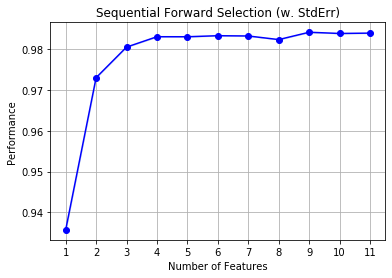

In [24]:
sfs1 = sfs(RandomForestRegressor(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(df.iloc[:, :-1], df['class'])
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [25]:
#SequentialFeatureSelector : forward & backward 가능하도록..
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=True (Forward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
model=sfs(RandomForestRegressor(),k_features=3,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(df.iloc[:, :-1],df['class'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.8s finished

[2021-12-07 04:01:44] Features: 1/3 -- score: 0.5762132035820369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    7.6s finished

[2021-12-07 04:01:52] Features: 2/3 -- score: 0.7545025276386091[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    7.5s finished

[2021-12-07 04:01:59] Features: 3/3 -- score: 0.7951306714086078

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=3,
                          n_jobs=-1, scoring='r2', verbose=2)

In [26]:
list(model.k_feature_names_)

['worst texture', 'worst perimeter', 'worst smoothness']

In [27]:
X_train = df[list(model.k_feature_names_)].iloc[idx_train, :]
y_train = df.iloc[idx_train, -1]
X_test = df[list(model.k_feature_names_)].iloc[idx_test, :]
y_test = df.iloc[idx_test, -1]

In [28]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [29]:
get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.9473684210526315
Confusion Matrix:
[[ 57   6]
 [  3 105]]
Precision: 0.9459459459459459, Recall: 0.9722222222222222
F1: 0.9589041095890412, AUC: 0.9836860670194003


→ 예측 정확도 94%, 재현율 97%

In [ ]:
#정확도는 높지만 오래걸림..!

### 3. Embedded Method

- Lasso<br>
L1 정규화를 수행하는데 계수의 크기의 절댓값과 동일한 패널티를 준다<br>
https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

In [30]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel

In [31]:
reg = LassoCV()
reg.fit(df.iloc[:, :-1], df['class'])
print("Best alpha using built-in LassoCV : %f"%reg.alpha_)
print("Best score using built-in LassoCV : %f"%reg.score(df.iloc[:, :-1], df['class']))
coef = pd.Series(reg.coef_, index=df.columns[:-1])

Best alpha using built-in LassoCV : 0.201830
Best score using built-in LassoCV : 0.661795


In [32]:
print("Lasso picked " + str(sum(coef!=0)) + " variables and eliminated the other "+str(sum(coef==0)) + " variables")

Lasso picked 4 variables and eliminated the other 26 variables


In [33]:
from matplotlib.colors import Colormap
palette = sns.color_palette("Spectral", 30)

Text(0.5, 1.0, 'Feature importance using Lasso Model')

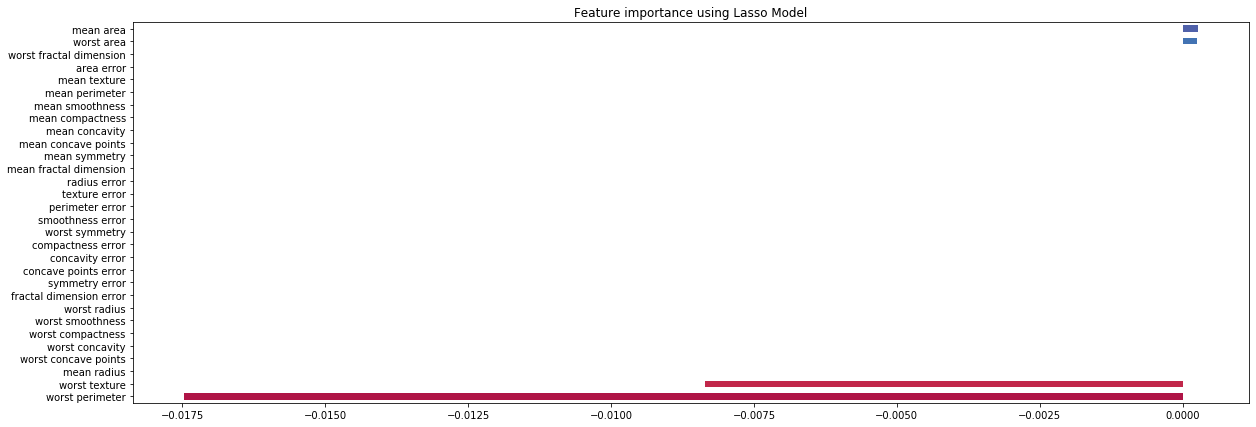

In [34]:
imp_coef = coef.sort_values()

imp_coef.plot(kind='barh', color=palette, figsize=(20, 7))
plt.title("Feature importance using Lasso Model")

In [35]:
for i in range(len(df.columns[:-1])):
    if reg.coef_[i] != 0:
        print(df.columns[:-1][i])

mean area
worst texture
worst perimeter
worst area


In [36]:
X_train = df[['mean area', 'worst texture', 'worst perimeter', 'worst area']].iloc[idx_train, :]
y_train = df.iloc[idx_train, -1]
X_test = df[['mean area', 'worst texture', 'worst perimeter', 'worst area']].iloc[idx_test, :]
y_test = df.iloc[idx_test, -1]

In [37]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [38]:
get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.935672514619883
Confusion Matrix:
[[ 57   6]
 [  5 103]]
Precision: 0.944954128440367, Recall: 0.9537037037037037
F1: 0.9493087557603688, AUC: 0.9756025867136979


→ 예측 정확도 93%, 재현율 95%

In [39]:
#tree
from sklearn.ensemble import RandomForestClassifier
fmodel = RandomForestClassifier()
fmodel.fit(df.iloc[:, :-1], df['class'])
fmodel.feature_importances_

array([0.04668862, 0.0179015 , 0.07509812, 0.03713493, 0.00684079,
       0.0113968 , 0.05004714, 0.12625584, 0.00221578, 0.00251833,
       0.0118738 , 0.00422505, 0.01160295, 0.04673657, 0.00289333,
       0.00428261, 0.00339566, 0.0046773 , 0.00389147, 0.005334  ,
       0.11459954, 0.0206941 , 0.10201607, 0.11237016, 0.01149947,
       0.01751239, 0.03512757, 0.09258939, 0.01128659, 0.00729414])

In [40]:
sel = SelectFromModel(estimator=fmodel, prefit=True, threshold='mean')
sel.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False])

In [41]:
for i in range(len(df.columns[:-1])):
    if sel.get_support()[i]:
        print(df.columns[:-1][i])

mean radius
mean perimeter
mean area
mean concavity
mean concave points
area error
worst radius
worst perimeter
worst area
worst concavity
worst concave points


In [42]:
X_train = df.iloc[idx_train, [i for i, value in enumerate(list(sel.get_support())) if value]]
y_train = df.iloc[idx_train, -1]
X_test = df.iloc[idx_test, [i for i, value in enumerate(list(sel.get_support())) if value]]
y_test = df.iloc[idx_test, -1]

In [43]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)
pred = rd_clf.predict(X_test)
pred_proba = rd_clf.predict_proba(X_test)[:, 1]

In [44]:
get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.9122807017543859
Confusion Matrix:
[[ 55   8]
 [  7 101]]
Precision: 0.926605504587156, Recall: 0.9351851851851852
F1: 0.9308755760368663, AUC: 0.9697236919459141


→ 예측 정확도 91%, 재현율 93% <br>
적은 feature로 비슷한 성능을 냄..

### PCA*
번외..

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(df.iloc[:, :-1])
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])

In [47]:
pca.explained_variance_ratio_ #주성분 2개로 98% 이상 설명가능 

array([0.98204467, 0.01617649])

In [48]:
#X_train, X_test, y_train, y_test = train_test_split(principalDf, pima_df['class'], test_size=0.3, random_state=99999, shuffle=False)
X_train = principalDf.iloc[idx_train, :]
y_train = df.iloc[idx_train, -1]
X_test = principalDf.iloc[idx_test, :]
y_test = df.iloc[idx_test, -1]

In [49]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [50]:
get_clf_eval(y_test, pred, pred_proba)

Accuracy: 0.9122807017543859
Confusion Matrix:
[[ 53  10]
 [  5 103]]
Precision: 0.911504424778761, Recall: 0.9537037037037037
F1: 0.9321266968325793, AUC: 0.969429747207525


→ 예측 정확도 91%, 재현율 95%

In [ ]:
#예측 정확도는 비슷하지만, 데이터가 많을 경우 학습 속도가 빨라질것..!

## conclusion : feature selection/extractration에는 정해진 방법은 없다.. <br> → 데이터를 다양한 방법으로 handling하여 최적의 모델을 찾자...!

In [ ]:
# 현재 데이터에 어떻게 활용할지는 데이터에 대한 탐색을 더 진행한 후에..